In [46]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
import seaborn as sns 
import bokeh.plotting as bkh
from bokeh.io import output_notebook
from datetime import datetime
from datetime import timedelta
from sgp4.earth_gravity import wgs72 #wgs84, wgs72old
from sgp4.io import twoline2rv
import sklearn.preprocessing as ppimport
from bokeh.models import ColumnDataSource, DataRange1d, Plot, LinearAxis, Grid, Range1d, LabelSet, Label, LogAxis, GMapOptions
from bokeh.io import export_svgs, output_file, show, export_png
from bokeh.transform import dodge
import bokeh.colors as colors
from bokeh.colors import Color
from bokeh.models.ranges import FactorRange
from mpl_toolkits.mplot3d import Axes3D 
import plotly.graph_objects as go
from sgp4.earth_gravity import wgs72 #wgs84, wgs72old
from sgp4.io import twoline2rv

In [127]:
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)

In [128]:
dfdeb = pickle.load(open('df_debleo_r4.p', 'rb'))
dfdeb = dfdeb.drop(['name', 'set_num'], axis = 1)

In [129]:
dfdeb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1003419 entries, 11477 to 7721767
Data columns (total 26 columns):
m              1003419 non-null float64
argp           1003419 non-null float64
bstar          1003419 non-null float64
ddn_o6         1003419 non-null float64
dn_o2          1003419 non-null float64
ecc            1003419 non-null float64
epoch_day      1003419 non-null float64
epoch_year     1003419 non-null int64
inc            1003419 non-null float64
int_desig      1003419 non-null object
n              1003419 non-null float64
norad          1003419 non-null int64
raan           1003419 non-null float64
rev_num        1003419 non-null int64
line1          1003419 non-null object
line2          1003419 non-null object
object_id      1003419 non-null object
object_name    1003419 non-null object
country        1003419 non-null object
period         1003419 non-null float64
inclination    1003419 non-null float64
apogee         1003419 non-null float64
perigee        

In [130]:
len(dfdeb) / dfdeb.norad.nunique()

361.5924324324324

In [6]:
#dfdeb = dfdeb.drop(['name', 'set_num'], axis = 1)

In [7]:
dfdeb

,m,argp,bstar,ddn_o6,dn_o2,ecc,epoch_day,epoch_year,inc,int_desig,n,norad,raan,rev_num,line1,line2,object_id,object_name,country,period,inclination,apogee,perigee,rcs_size,launch,debc
13794,243.5184,117.7179,0.000045,0.0,5.200000e-07,0.011049,343.907086,2018,66.6834,61015H,14.369372,123,155.4155,98461,1 00123U 61015H 18343.90708637 +.00000052 +0...,2 00123 066.6834 155.4155 0110493 117.7179 243...,1961-015H,THOR ABLESTAR DEB,US,100.21,66.69,854.0,682.0,MEDIUM,1961-06-29,True
13795,244.2766,116.9665,0.000047,0.0,5.800000e-07,0.011043,344.881519,2018,66.6834,61015H,14.369375,123,152.8357,98475,1 00123U 61015H 18344.88151947 +.00000058 +0...,2 00123 066.6834 152.8357 0110428 116.9665 244...,1961-015H,THOR ABLESTAR DEB,US,100.21,66.69,854.0,682.0,MEDIUM,1961-06-29,True
13796,245.0333,116.2164,0.000048,0.0,6.000000e-07,0.011037,345.855952,2018,66.6835,61015H,14.369378,123,150.2560,98539,1 00123U 61015H 18345.85595241 .00000060 000...,2 00123 66.6835 150.2560 0110366 116.2164 245....,1961-015H,THOR ABLESTAR DEB,US,100.21,66.69,854.0,682.0,MEDIUM,1961-06-29,True
13797,245.0869,116.1634,0.000048,0.0,5.900000e-07,0.011037,345.925555,2018,66.6835,61015H,14.369378,123,150.0717,98490,1 00123U 61015H 18345.92555475 +.00000059 +0...,2 00123 066.6835 150.0717 0110367 116.1634 245...,1961-015H,THOR ABLESTAR DEB,US,100.21,66.69,854.0,682.0,MEDIUM,1961-06-29,True
13798,245.8458,115.4111,0.000046,0.0,5.600000e-07,0.011032,346.899987,2018,66.6835,61015H,14.369382,123,147.4919,98504,1 00123U 61015H 18346.89998735 +.00000056 +0...,2 00123 066.6835 147.4919 0110316 115.4111 245...,1961-015H,THOR ABLESTAR DEB,US,100.21,66.69,854.0,682.0,MEDIUM,1961-06-29,True
13799,246.6042,114.6589,0.000044,0.0,4.800000e-07,0.011026,347.874420,2018,66.6836,61015H,14.369384,123,144.9121,98568,1 00123U 61015H 18347.87441976 .00000048 000...,2 00123 66.6836 144.9121 0110255 114.6589 246....,1961-015H,THOR ABLESTAR DEB,US,100.21,66.69,854.0,682.0,MEDIUM,1961-06-29,True
13800,247.3595,113.9097,0.000043,0.0,4.400000e-07,0.011020,348.848852,2018,66.6837,61015H,14.369387,123,142.3324,98532,1 00123U 61015H 18348.84885195 +.00000044 +0...,2 00123 066.6837 142.3324 0110197 113.9097 247...,1961-015H,THOR ABLESTAR DEB,US,100.21,66.69,854.0,682.0,MEDIUM,1961-06-29,True
13801,248.1183,113.1568,0.000043,0.0,4.600000e-07,0.011014,349.823284,2018,66.6839,61015H,14.369389,123,139.7526,98546,1 00123U 61015H 18349.82328392 +.00000046 +0...,2 00123 066.6839 139.7526 0110137 113.1568 248...,1961-015H,THOR ABLESTAR DEB,US,100.21,66.69,854.0,682.0,MEDIUM,1961-06-29,True
13802,248.3888,112.8884,0.000042,0.0,4.100000e-07,0.011012,350.171295,2018,66.6839,61015H,14.369390,123,138.8313,98601,1 00123U 61015H 18350.17129526 .00000041 000...,2 00123 66.6839 138.8313 0110115 112.8884 248....,1961-015H,THOR ABLESTAR DEB,US,100.21,66.69,854.0,682.0,MEDIUM,1961-06-29,True
13803,248.9275,112.3538,0.000039,0.0,3.200000e-07,0.011008,350.867318,2018,66.6840,61015H,14.369392,123,136.9886,98561,1 00123U 61015H 18350.86731797 +.00000032 +0...,2 00123 066.6840 136.9886 0110085 112.3538 248...,1961-015H,THOR ABLESTAR DEB,US,100.21,66.69,854.0,682.0,MEDIUM,1961-06-29,True


In [209]:
mu = 3.986004418E5 * (3600 * 24) ** 2
earthreq = 6378
def apogeecal(n, ecc):
    return np.power(mu / (4. * (np.pi * n) ** 2), 1. / 3.) * (1 + ecc)
def perigeecal(n, ecc):
    return np.power(mu / (4. * (np.pi * n) ** 2), 1. / 3.) * (1 - ecc)

In [210]:
dfdeb['apo'] = apogeecal(dfdeb.n, dfdeb.ecc)
dfdeb['peri'] = perigeecal(dfdeb.n, dfdeb.ecc)

In [133]:
dfdeb.describe()

,m,argp,bstar,ddn_o6,dn_o2,ecc,epoch_day,epoch_year,inc,n,norad,raan,rev_num,period,inclination,apogee,perigee,apo,peri
count,1.003419e+06,1.003419e+06,1.003419e+06,1.003419e+06,1.003419e+06,1.003419e+06,1.003419e+06,1.003419e+06,1.003419e+06,1.003419e+06,1.003419e+06,1.003419e+06,1.003419e+06,1.003419e+06,1.003419e+06,1.003419e+06,1.003419e+06,1.003419e+06,1.003419e+06
mean,1.812252e+02,1.778184e+02,3.528841e-04,3.872253e-08,1.067282e-05,1.390622e-02,1.836240e+02,2.018906e+03,8.824197e+01,1.394214e+01,2.563672e+04,1.819618e+02,5.042981e+04,1.035812e+02,8.824092e+01,1.029137e+03,8.213019e+02,7.304641e+03,7.302400e+03
std,1.057571e+02,1.043492e+02,3.442977e-03,8.029767e-06,7.676870e-05,1.967084e-02,1.072051e+02,2.913827e-01,1.458025e+01,7.554552e-01,1.226846e+04,1.053330e+02,2.535159e+04,6.010867e+00,1.457988e+01,3.785202e+02,2.436315e+02,2.785736e+02,2.753588e+02
min,1.000000e-04,1.000000e-04,-2.161600e-01,0.000000e+00,-1.977520e-03,2.900000e-06,1.000471e+00,2.018000e+03,2.687470e+01,1.122406e+01,1.190000e+02,7.000000e-04,0.000000e+00,8.948000e+01,2.688000e+01,2.530000e+02,2.430000e+02,6.626970e+03,6.626969e+03
25%,8.775190e+01,8.736660e+01,5.570300e-05,0.000000e+00,5.300000e-07,3.347200e-03,8.967868e+01,2.019000e+03,7.404960e+01,1.367967e+01,1.450400e+04,8.929400e+01,3.052600e+04,9.989000e+01,7.405000e+01,8.020000e+02,6.780000e+02,7.131697e+03,7.131476e+03
50%,1.821561e+02,1.755194e+02,1.543800e-04,0.000000e+00,2.830000e-06,7.329300e-03,1.832770e+02,2.019000e+03,9.826610e+01,1.412640e+01,3.005800e+04,1.835770e+02,5.359500e+04,1.019200e+02,9.826000e+01,9.130000e+02,7.820000e+02,7.228488e+03,7.228226e+03
75%,2.746009e+02,2.686547e+02,3.500700e-04,0.000000e+00,7.440000e-06,1.549045e-02,2.775000e+02,2.019000e+03,9.901420e+01,1.441496e+01,3.472500e+04,2.751873e+02,6.475900e+04,1.052600e+02,9.901000e+01,1.141000e+03,8.680000e+02,7.385015e+03,7.384167e+03
max,3.599997e+02,3.599993e+02,4.075100e-01,3.744100e-03,2.070283e-02,1.906833e-01,3.659990e+02,2.019000e+03,1.078432e+02,1.609275e+01,4.478900e+04,3.599993e+02,9.999900e+04,1.276100e+02,1.078400e+02,3.606000e+03,1.875000e+03,8.426265e+03,8.394926e+03


In [134]:
dfdeb[dfdeb.rev_num >= 99_999].count()

m              8
argp           8
bstar          8
ddn_o6         8
dn_o2          8
ecc            8
epoch_day      8
epoch_year     8
inc            8
int_desig      8
n              8
norad          8
raan           8
rev_num        8
line1          8
line2          8
object_id      8
object_name    8
country        8
period         8
inclination    8
apogee         8
perigee        8
rcs_size       8
launch         8
debc           8
apo            8
peri           8
dtype: int64

In [12]:
#dfdeb.groupby('epoch_year', axis = 1)

In [135]:

output_notebook()

Loading BokehJS ...

In [14]:
apoc = dfdeb.apo
ly = earthreq + 200#min(apoc)
oy = earthreq + 2_000#max(apoc)
#goal_succ_count, edges_goal = np.histogram(loggoal_succ, bins=30, 
#                                      normed=True, weights=None, density=None, range = (ly,oy))
apo_count, edges_apo = np.histogram(apoc, bins=100, 
                                      normed=False, weights=None, density=None, range = (ly,oy))
#goal_succ_count = [goal_succ_count / df_tot7[df_tot7.success == 1].goal.count() for x in goal_succ_count]
#goal_count = [goal_count / df_tot7.goal.count() for x in goal_count]
plot1 = bkh.figure(x_range = (ly, oy))
xaxis = LinearAxis()
yaxis = LinearAxis()
plot1.xaxis[0].axis_label = 'Distance of apogee in km'
plot1.yaxis[0].axis_label = 'Tracked space debris count'
#volume_figure.vbar_stack(["buys"], x='timestamp', width=1.0, color=[colors.turquoise], source=source)
plot1.vbar(x = edges_apo[:-1], width = 0.9 * (edges_apo[1] - edges_apo[0]), top = apo_count, color = "#FF5E33", fill_alpha = 0.7, legend = 'all')
#plot1.vbar(x = edges_apo[:-1], width = 0.9 * (edges_apo[1] - edges_apo[0]), top = goal_succ_count, color = "#9033FF", fill_alpha = 0.7, legend = 'successful')
plot1.add_layout(Grid(dimension=0, ticker=xaxis.ticker))
plot1.add_layout(Grid(dimension=1, ticker=yaxis.ticker))
#plot1.output_backend = "png"
export_png(plot1, filename="apo.png")
bkh.show(plot1)

/Users/peterniksa/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: DeprecationWarning: Passing normed=False is deprecated, and has no effect. Consider passing the density argument instead.
  import sys


In [15]:
apoc = dfdeb.inc
ly = min(apoc) - 1
oy = max(apoc) + 1
#goal_succ_count, edges_goal = np.histogram(loggoal_succ, bins=30, 
#                                      normed=True, weights=None, density=None, range = (ly,oy))
apo_count, edges_apo = np.histogram(apoc, bins=500, 
                                      normed=False, weights=None, density=None, range = (ly,oy))
#goal_succ_count = [goal_succ_count / df_tot7[df_tot7.success == 1].goal.count() for x in goal_succ_count]
#goal_count = [goal_count / df_tot7.goal.count() for x in goal_count]
plot1 = bkh.figure(x_range = (ly, oy))
xaxis = LinearAxis()
yaxis = LinearAxis()
plot1.xaxis[0].axis_label = 'Inclination in °'
plot1.yaxis[0].axis_label = 'Tracked space debris count'
#volume_figure.vbar_stack(["buys"], x='timestamp', width=1.0, color=[colors.turquoise], source=source)
plot1.vbar(x = edges_apo[:-1], width = 0.9 * (edges_apo[1] - edges_apo[0]), top = apo_count, color = "#FF5E33", fill_alpha = 0.7, legend = 'all')
#plot1.vbar(x = edges_apo[:-1], width = 0.9 * (edges_apo[1] - edges_apo[0]), top = goal_succ_count, color = "#9033FF", fill_alpha = 0.7, legend = 'successful')
plot1.add_layout(Grid(dimension=0, ticker=xaxis.ticker))
plot1.add_layout(Grid(dimension=1, ticker=yaxis.ticker))
#plot1.output_backend = "png"
export_png(plot1, filename="inc.png")
bkh.show(plot1)

/Users/peterniksa/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: DeprecationWarning: Passing normed=False is deprecated, and has no effect. Consider passing the density argument instead.
  import sys


In [136]:
dfdeb.corr()

,m,argp,bstar,ddn_o6,dn_o2,ecc,epoch_day,epoch_year,inc,n,norad,raan,rev_num,period,inclination,apogee,perigee,apo,peri
m,1.000000,-0.430900,-0.009875,0.002856,0.009629,0.003954,-0.002498,-0.000412,0.005734,0.010455,0.020542,-0.004783,-0.008444,-0.011162,0.005751,-0.006954,-0.014596,-0.010911,-0.011099
argp,-0.430900,1.000000,0.011998,-0.002065,-0.008721,-0.013141,0.005315,-0.000172,-0.014423,-0.002586,-0.019991,0.016681,0.004500,0.003541,-0.014442,-0.002788,0.012123,0.003239,0.003541
bstar,-0.009875,0.011998,1.000000,0.001561,0.147203,0.039062,0.009830,-0.018508,0.004312,-0.051571,0.013322,0.005156,-0.037180,0.052437,0.004003,0.050803,0.040344,0.053778,0.053155
ddn_o6,0.002856,-0.002065,0.001561,1.000000,0.686839,0.008529,-0.002379,0.001151,-0.010956,0.006428,0.006502,-0.003359,-0.007326,-0.004960,-0.010956,-0.000442,-0.011321,-0.004950,-0.005523
dn_o2,0.009629,-0.008721,0.147203,0.686839,1.000000,0.023853,0.014242,0.003959,-0.037016,0.123233,0.100354,-0.007666,-0.070810,-0.115949,-0.037052,-0.080340,-0.146959,-0.111114,-0.114547
ecc,0.003954,-0.013141,0.039062,0.008529,0.023853,1.000000,-0.001822,0.000543,-0.280391,-0.472642,-0.200571,-0.014560,-0.033140,0.473962,-0.280367,0.751283,-0.081320,0.476294,0.453498
epoch_day,-0.002498,0.005315,0.009830,-0.002379,0.014242,-0.001822,1.000000,-0.503180,0.002688,0.003340,0.022291,0.080842,-0.002674,-0.001883,0.002713,-0.001905,-0.001438,-0.003012,-0.002965
epoch_year,-0.000412,-0.000172,-0.018508,0.001151,0.003959,0.000543,-0.503180,1.000000,0.000775,0.002758,0.001020,0.049656,0.002126,-0.001460,0.000802,-0.000919,-0.001964,-0.002543,-0.002570
inc,0.005734,-0.014423,0.004312,-0.010956,-0.037016,-0.280391,0.002688,0.000775,1.000000,-0.011319,0.203404,-0.004171,-0.029955,0.008324,0.999999,-0.105179,0.184039,0.007956,0.016939
n,0.010455,-0.002586,-0.051571,0.006428,0.123233,-0.472642,0.003340,0.002758,-0.011319,1.000000,0.416824,-0.001166,0.049243,-0.997405,-0.011360,-0.934371,-0.837815,-0.998057,-0.997926


In [17]:
apo_count

array([     0,      0,      0,      0,      1,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,    310,
            0,   1424,   3537,    773,    367,    490,    840,      0,
      

In [18]:
apoc = dfdeb.ecc
ly = min(apoc) 
oy = 0.25#max(apoc)
#goal_succ_count, edges_goal = np.histogram(loggoal_succ, bins=30, 
#                                      normed=True, weights=None, density=None, range = (ly,oy))
apo_count, edges_apo = np.histogram(apoc, bins=500, 
                                      normed=False, weights=None, density=None, range = (ly,oy))
#goal_succ_count = [goal_succ_count / df_tot7[df_tot7.success == 1].goal.count() for x in goal_succ_count]
#goal_count = [goal_count / df_tot7.goal.count() for x in goal_count]
plot1 = bkh.figure(x_range = (ly, oy))
xaxis = LinearAxis()
yaxis = LinearAxis()
plot1.xaxis[0].axis_label = 'Inclination in °'
plot1.yaxis[0].axis_label = 'Tracked space debris count'
#volume_figure.vbar_stack(["buys"], x='timestamp', width=1.0, color=[colors.turquoise], source=source)
plot1.vbar(x = edges_apo[:-1], width = 0.9 * (edges_apo[1] - edges_apo[0]), top = apo_count, color = "#FF5E33", fill_alpha = 0.7, legend = 'all')
#plot1.vbar(x = edges_apo[:-1], width = 0.9 * (edges_apo[1] - edges_apo[0]), top = goal_succ_count, color = "#9033FF", fill_alpha = 0.7, legend = 'successful')
plot1.add_layout(Grid(dimension=0, ticker=xaxis.ticker))
plot1.add_layout(Grid(dimension=1, ticker=yaxis.ticker))
#plot1.output_backend = "png"
export_png(plot1, filename="inc.png")
bkh.show(plot1)

/Users/peterniksa/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: DeprecationWarning: Passing normed=False is deprecated, and has no effect. Consider passing the density argument instead.
  import sys


In [137]:
def plothist(feature, two_feat = False, min_feat = None, max_feat = None, x_axis_l = 'x', y_axis_l = 'y', fname = 'last.png', bins = 100):
    sfeature = feature
    feature1 = feature
    feature2 = feature
    if two_feat:
        sfeature = feature[0] + feature[1]
        feature1 = feature[0]
        feature2 = feature[1]
    if min_feat == None:
        min_feat = min(sfeature)
    if max_feat == None:
        max_feat = max(sfeature)
    # feature e.g. dfdeb.ecc
    #apoc = feature
    ly = min_feat 
    oy = max_feat#max(apoc)
#goal_succ_count, edges_goal = np.histogram(loggoal_succ, bins=30, 
#                                      normed=True, weights=None, density=None, range = (ly,oy))
    apo_count, edges_apo = np.histogram(feature1, bins=bins, 
                                          normed=False, weights=None, density=None, range = (ly,oy))
    if two_feat:
        apo_count2, edges_apo2 = np.histogram(feature2, bins=bins, 
                                              normed=False, weights=None, density=None, range = (ly,oy))
#goal_succ_count = [goal_succ_count / df_tot7[df_tot7.success == 1].goal.count() for x in goal_succ_count]
#goal_count = [goal_count / df_tot7.goal.count() for x in goal_count]
    plot1 = bkh.figure(x_range = (ly, oy))
    xaxis = LinearAxis()
    yaxis = LinearAxis()
    plot1.xaxis[0].axis_label = x_axis_l
    plot1.yaxis[0].axis_label = y_axis_l
#volume_figure.vbar_stack(["buys"], x='timestamp', width=1.0, color=[colors.turquoise], source=source)
    plot1.vbar(x = edges_apo[:-1], width = 0.9 * (edges_apo[1] - edges_apo[0]), top = apo_count, color = "#FF5E33", fill_alpha = 0.7, legend = 'first')
    if two_feat:
        plot1.vbar(x = edges_apo2[:-1], width = 0.9 * (edges_apo2[1] - edges_apo2[0]), top = apo_count2, color = "#9033FF", fill_alpha = 0.7, legend = 'last')
    plot1.add_layout(Grid(dimension=0, ticker=xaxis.ticker))
    plot1.add_layout(Grid(dimension=1, ticker=yaxis.ticker))
#plot1.output_backend = "png"
    export_png(plot1, filename = fname)
    bkh.show(plot1)

In [20]:
#kNN Analysis looplothistking for pattern in the overall fluctuations of the orbits

In [138]:
dfdeb['date'] = dfdeb['epoch_year'] + dfdeb.epoch_day / 366 # for non schalt-year

In [139]:
print(dfdeb[['norad', 'date']].nunique())
print(len(dfdeb[['date']]))

norad      2775
date     978860
dtype: int64
1003419


In [140]:
dateslist = list()
#dfdeb['epoch_sec'] = datetime(year = int(dfdeb.epoch_year.values), month = 1, day = 1, hour = 0, minute = 0, second = 0)\
# + timedelta(seconds = dfdeb.epoch_day.values * 24 * 3600)
for i in range(len(dfdeb.epoch_year.values)):
   # print(i)
    dateslist.append((datetime(year = dfdeb.epoch_year.values[i], month = 1, day = 1, hour = 0, minute = 0, second = 0)\
 + timedelta(seconds = dfdeb.epoch_day.values[i] * 24 * 3600)))

In [141]:
dfdeb['datetimes'] = dateslist
#.astype(object).year
dfdeb['datetimes'] = dfdeb.datetimes.astype(object)

In [142]:
dfdeb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1003419 entries, 11477 to 7721767
Data columns (total 30 columns):
m              1003419 non-null float64
argp           1003419 non-null float64
bstar          1003419 non-null float64
ddn_o6         1003419 non-null float64
dn_o2          1003419 non-null float64
ecc            1003419 non-null float64
epoch_day      1003419 non-null float64
epoch_year     1003419 non-null int64
inc            1003419 non-null float64
int_desig      1003419 non-null object
n              1003419 non-null float64
norad          1003419 non-null int64
raan           1003419 non-null float64
rev_num        1003419 non-null int64
line1          1003419 non-null object
line2          1003419 non-null object
object_id      1003419 non-null object
object_name    1003419 non-null object
country        1003419 non-null object
period         1003419 non-null float64
inclination    1003419 non-null float64
apogee         1003419 non-null float64
perigee        

In [143]:
dfdeb.drop(dfdeb[dfdeb.rcs_size.isna()].index, axis = 0, inplace = True)#.unique()

In [ ]:
# plug stuff in here

In [164]:
#date as datetime

In [ ]:
#xyz_model(dfdeb.line1.values[0], dfdeb.line2.values[0], dfdeb.datetimes.values[0])
xcon = list()
ycon = list()
zcon = list()
for i in range(len(dfdeb)):
    xyz = xyz_model(dfdeb.line1.values[i], dfdeb.line2.values[i], dfdeb.datetimes.values[i])
    xcon.append(xyz[0])
    ycon.append(xyz[1])
    zcon.append(xyz[2])
dfdeb['x'] = xcon
dfdeb['y'] = ycon
dfdeb['z'] = zcon

In [204]:
xcon = list()
ycon = list()
zcon = list()
datetest = datetime(year = 2019, month = 12, day = 1, hour = 0, minute = 0, second = 0)
for i in range(len(dfdeb)):
    xyz = xyz_model(dfdeb.line1.values[i], dfdeb.line2.values[i], datetest)
    xcon.append(xyz[0])
    ycon.append(xyz[1])
    zcon.append(xyz[2])
dfdeb['x'] = xcon
dfdeb['y'] = ycon
dfdeb['z'] = zcon

In [175]:
def coordcalt(line1, line2, date):
    xcon = list()
    ycon = list()
    zcon = list()
    for i in range(len(line1)):
        xyz = xyz_model(line1[i], line2[i], datetest)
        xcon.append(xyz[0])
        ycon.append(xyz[1])
        zcon.append(xyz[2])
    return xcon, ycon, zcon

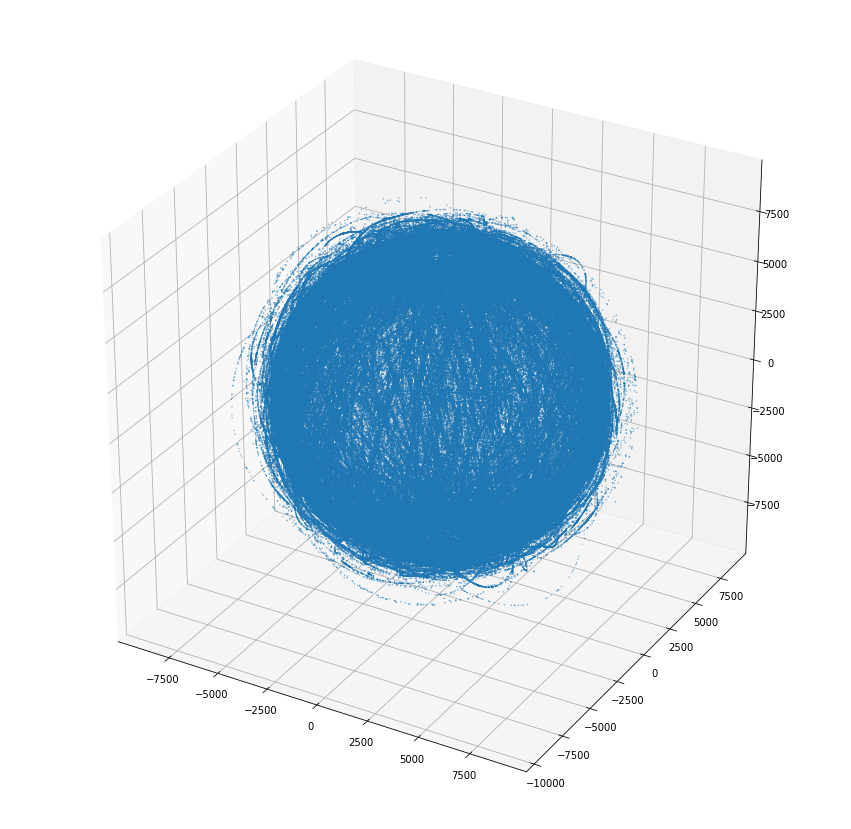

In [170]:
fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xcon, ycon, zcon, s = 0.2)

In [337]:

#import numpy as np

# Helix equation
#t = np.linspace(0, 10, 50)
#x, y, z = np.cos(t), np.sin(t), t

fig = go.Figure(data=[go.Scatter3d(x=xc, y=yc, z=zc,
                                   mode='markers')])
fig.show()

In [362]:
def calorbitxyz(inc, n, raan, ecc, npoints = 100):
    #raan = np.pi / 180
    #inc = np.pi / 180
    x = list()
    y = list()
    z = list()
    mu = 3.986004418E5 * (3600 * 24) ** 2
    earthreq = 6378
    apo = np.power(mu / (4. * (np.pi * n) ** 2), 1. / 3.) * (1. + ecc)
    peri = np.power(mu / (4. * (np.pi * n) ** 2), 1. / 3.) * (1. - ecc)
    a = (apo + peri) / 2
    oecc = np.sqrt(1 - ecc ** 2)
    b = a * oecc
    b2 = b * b
    a2 = a * a
    xp = np.linspace(-a, a, npoints) 
    raan_cos = np.cos(raan)
    raan_sin = np.sin(raan)
    inc_cos = np.cos(inc)
    inc_sin = np.sin(inc)
    #print(xp)
    for i in xp:
        x.append(i)
        x.append(i)
        yabs = np.sqrt(b2 - i * i * b2 / a2)
        y.append(yabs)
        y.append(-yabs)
    x = np.array(x)
    y = np.array(y)
    xn = x * raan_cos - y * raan_sin
    yn = y * raan_cos + x * raan_sin
    z = xn * np.sin(inc)
    xn *= np.cos(inc)
    x = xn * raan_cos + yn * raan_sin
    y = yn * raan_cos - xn * raan_sin
    return x, y, z

In [363]:
dfdeb.head()

,m,argp,bstar,ddn_o6,dn_o2,ecc,epoch_day,epoch_year,inc,int_desig,n,norad,raan,rev_num,line1,line2,object_id,object_name,country,period,inclination,apogee,perigee,rcs_size,launch,debc,apo,peri,date,datetimes,x,y,z
11477,277.0305,84.1924,0.000106,0.0,0.000002,0.009775,343.944544,2018,66.7295,61015D,14.231585,119,299.5038,96720,1 00119U 61015D 18343.94454394 +.00000169 +0...,2 00119 066.7295 299.5038 0097752 084.1924 277...,1961-015D,THOR ABLESTAR DEB,US,101.18,66.73,891.0,738.0,MEDIUM,1961-06-29,True,7263.139166,7122.516505,2018.939739,2018-12-10 22:40:08.596416,1637.533815,4415.087376,-5486.342149
11478,277.7405,83.4810,0.000129,0.0,0.000002,0.009778,344.858134,2018,66.7296,61015D,14.231592,119,297.1432,96733,1 00119U 61015D 18344.85813364 +.00000223 +0...,2 00119 066.7296 297.1432 0097776 083.4810 277...,1961-015D,THOR ABLESTAR DEB,US,101.18,66.73,891.0,738.0,MEDIUM,1961-06-29,True,7263.154061,7122.496920,2018.942235,2018-12-11 20:35:42.746496,412.351193,6369.916536,-3442.251296
11479,278.0692,83.1515,0.000138,0.0,0.000002,0.009778,345.279790,2018,66.7296,61015D,14.231594,119,296.0537,96739,1 00119U 61015D 18345.27979033 +.00000244 +0...,2 00119 066.7296 296.0537 0097780 083.1515 278...,1961-015D,THOR ABLESTAR DEB,US,101.18,66.73,891.0,738.0,MEDIUM,1961-06-29,True,7263.156012,7122.493135,2018.943387,2018-12-12 06:42:53.884512,-102.175022,6833.965457,-2442.432840
11480,278.7813,82.4378,0.000155,0.0,0.000003,0.009780,346.193380,2018,66.7297,61015D,14.231601,119,293.6931,96795,1 00119U 61015D 18346.19337954 +.00000286 +0...,2 00119 066.7297 293.6931 0097799 082.4378 278...,1961-015D,THOR ABLESTAR DEB,US,101.18,66.73,891.0,738.0,MEDIUM,1961-06-29,True,7263.167586,7122.477417,2018.945884,2018-12-13 04:38:27.992256,-1059.657250,7175.912779,-377.555899
11481,279.3214,81.8966,0.000168,0.0,0.000003,0.009784,346.896140,2018,66.7297,61015D,14.231606,119,291.8774,96762,1 00119U 61015D 18346.89614006 +.00000316 +0...,2 00119 066.7297 291.8774 0097835 081.8966 279...,1961-015D,THOR ABLESTAR DEB,US,101.18,66.73,891.0,738.0,MEDIUM,1961-06-29,True,7263.191561,7122.449641,2018.947804,2018-12-13 21:30:26.501184,-1707.622111,6956.813002,1197.298150


In [364]:
dfdeb[dfdeb.ecc >0.1]

,m,argp,bstar,ddn_o6,dn_o2,ecc,epoch_day,epoch_year,inc,int_desig,n,norad,raan,rev_num,line1,line2,object_id,object_name,country,period,inclination,apogee,perigee,rcs_size,launch,debc,apo,peri,date,datetimes,x,y,z
119200,209.1225,158.5824,0.000297,0.000000,0.000025,0.161156,343.925429,2018,60.7046,64038C,12.000351,831,198.7863,2943,1 00831U 64038C 18343.92542894 +.00002465 +0...,2 00831 060.7046 198.7863 1611559 158.5824 209...,1964-038C,ELEKTRON 3 DEB,CIS,119.87,60.72,2961.0,389.0,MEDIUM,1964-07-10,True,9357.569799,6760.110521,2018.939687,2018-12-10 22:12:37.060416,1877.693501,3705.567686,-5457.668615
119201,208.9717,158.6957,0.000280,0.000000,0.000023,0.161154,344.175386,2018,60.7046,64038C,12.000365,831,198.2200,2944,1 00831U 64038C 18344.17538624 +.00002317 +0...,2 00831 060.7046 198.2200 1611542 158.6957 208...,1964-038C,ELEKTRON 3 DEB,CIS,119.87,60.72,2961.0,389.0,MEDIUM,1964-07-10,True,9357.548826,6760.118967,2018.940370,2018-12-11 04:12:33.371136,2706.373556,-8594.177695,926.489063
119202,208.5191,159.0354,0.000292,0.000000,0.000024,0.161147,344.925256,2018,60.7045,64038C,12.000416,831,196.5210,2955,1 00831U 64038C 18344.92525618 +.00002419 +0...,2 00831 060.7045 196.5210 1611471 159.0354 208...,1964-038C,ELEKTRON 3 DEB,CIS,119.87,60.72,2961.0,389.0,MEDIUM,1964-07-10,True,9357.464992,6760.156957,2018.942419,2018-12-11 22:12:22.133952,3321.397694,1084.669160,-6217.734182
119203,208.0167,159.4121,0.000278,0.000000,0.000023,0.161139,345.758443,2018,60.7043,64038C,12.000459,831,194.6334,2963,1 00831U 64038C 18345.75844260 +.00002296 +0...,2 00831 060.7043 194.6334 1611390 159.4121 208...,1964-038C,ELEKTRON 3 DEB,CIS,119.87,60.72,2961.0,389.0,MEDIUM,1964-07-10,True,9357.377311,6760.206047,2018.944695,2018-12-12 18:12:09.440640,1481.107230,-8627.337948,2994.310352
119204,207.3626,159.9023,0.000289,0.000000,0.000024,0.161132,346.841581,2018,60.7045,64038C,12.000511,831,192.1791,2976,1 00831U 64038C 18346.84158087 +.00002386 +0...,2 00831 060.7045 192.1791 1611324 159.9023 207...,1964-038C,ELEKTRON 3 DEB,CIS,119.87,60.72,2961.0,389.0,MEDIUM,1964-07-10,True,9357.297024,6760.239657,2018.947655,2018-12-13 20:11:52.587168,3455.074409,-8130.340206,-615.810557
119205,207.3124,159.9399,0.000284,0.000000,0.000023,0.161132,346.924899,2018,60.7045,64038C,12.000514,831,191.9903,2979,1 00831U 64038C 18346.92489904 +.00002347 +0...,2 00831 060.7045 191.9903 1611317 159.9399 207...,1964-038C,ELEKTRON 3 DEB,CIS,119.87,60.72,2961.0,389.0,MEDIUM,1964-07-10,True,9357.289985,6760.244288,2018.947882,2018-12-13 22:11:51.277056,4535.727499,-3664.089744,-5247.931671
119206,206.7098,160.3910,0.000320,0.000000,0.000027,0.161124,347.924715,2018,60.7047,64038C,12.000566,831,189.7248,2989,1 00831U 64038C 18347.92471485 +.00002659 +0...,2 00831 060.7047 189.7248 1611244 160.3910 206...,1964-038C,ELEKTRON 3 DEB,CIS,119.87,60.72,2961.0,389.0,MEDIUM,1964-07-10,True,9357.204323,6760.283731,2018.950614,2018-12-14 22:11:35.363040,647.387028,5169.099562,-4326.889819
119207,206.7098,160.3910,0.000320,0.000000,0.000027,0.161124,347.924715,2018,60.7047,64038C,12.000566,831,189.7248,2991,1 00831U 64038C 18347.92471485 +.00002659 +0...,2 00831 060.7047 189.7248 1611244 160.3910 206...,1964-038C,ELEKTRON 3 DEB,CIS,119.87,60.72,2961.0,389.0,MEDIUM,1964-07-10,True,9357.204323,6760.283731,2018.950614,2018-12-14 22:11:35.363040,-4489.654083,3891.188381,5053.738341
119208,206.1048,160.8433,0.000333,0.000000,0.000028,0.161117,348.924526,2018,60.7049,64038C,12.000616,831,187.4594,3003,1 00831U 64038C 18348.92452626 +.00002774 +0...,2 00831 060.7049 187.4594 1611174 160.8433 206...,1964-038C,ELEKTRON 3 DEB,CIS,119.87,60.72,2961.0,389.0,MEDIUM,1964-07-10,True,9357.121968,6760.321398,2018.953346,2018-12-15 22:11:19.068864,-3777.396819,-2205.614612,7679.057354
119209,205.8019,161.0696,0.000370,0.000000,0.000031,0.161113,349.424430,2018,60.7050,64038C,12.000650,831,186.3268,3007,1 00831U 64038C 18349.42443001 +.00003098 +0...,2 00831 060.7050 186.3268 1611127 161.0696 205...,1964

0.0164393

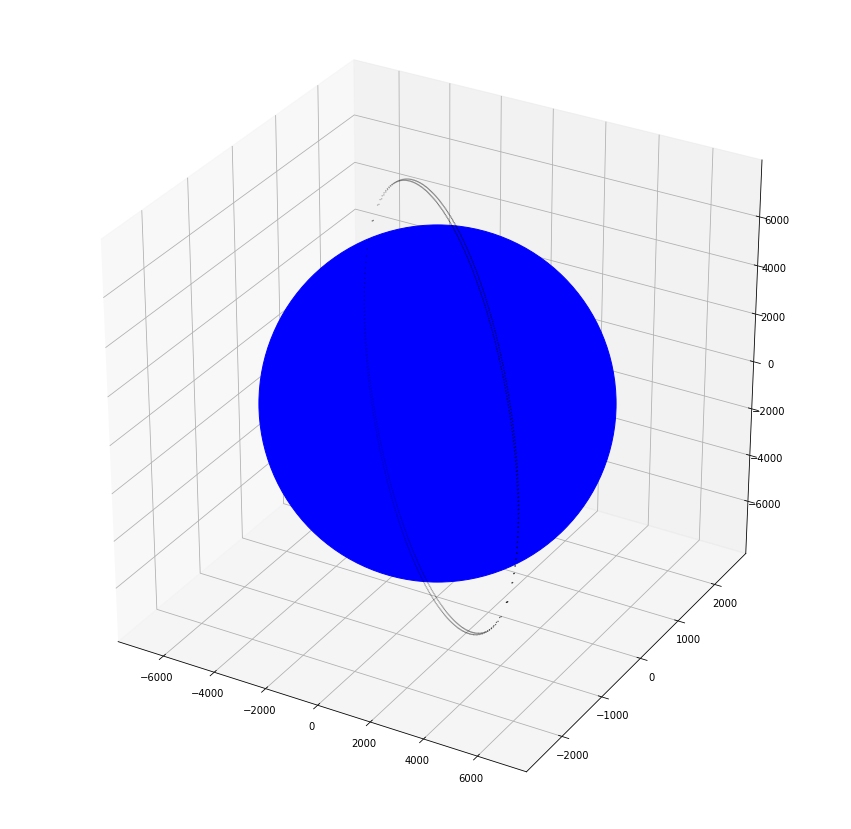

In [374]:
#inc, n, raan, ecc, npoints = 100
fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(111, projection='3d')
i1 = 0
i2 = -1#119237
io = 1545
xc, yc, zc = calorbitxyz(dfdeb_m.loc[norads[io]].inc.values[i1],dfdeb_m.loc[norads[io]].n.values[i1],dfdeb_m.loc[norads[io]].raan.values[i1],dfdeb_m.loc[norads[io]].ecc.values[i1], npoints = 200)
xc2, yc2, zc2 = calorbitxyz(dfdeb_m.loc[norads[io]].inc.values[i2],dfdeb_m.loc[norads[io]].n.values[i2],dfdeb_m.loc[norads[io]].raan.values[i1],dfdeb_m.loc[norads[io]].ecc.values[i2], npoints = 200)
#xc3, yc3, zc3 = calorbitxyz(dfdeb_m.loc[norads[0]].inc.values[i3],dfdeb_m.loc[norads[0]].n.values[i3],dfdeb_m.loc[norads[0]].raan.values[i3],dfdeb_m.loc[norads[0]].ecc.values[i3], npoints = 200)
# plot considers same raan angle in both
ax.scatter(np.append(xc, xc2), np.append(yc, yc2), np.append(zc, zc2), s = 0.1, c = 'black')
ax.scatter(0,0,0, s = earthreq * 20, c = 'blue')
#ax.scatter(xc2, yc2, zc2, s = 0.2)
dfdeb_m.loc[norads[io]].ecc.values[i1]


In [174]:
len(dfdeb_m.loc[norads[0]].line1)

495

In [211]:
dfdeb_m = dfdeb.set_index(['norad', 'date'])
dfdeb_m.sort_index(inplace=True)
norads = dfdeb.norad.unique()

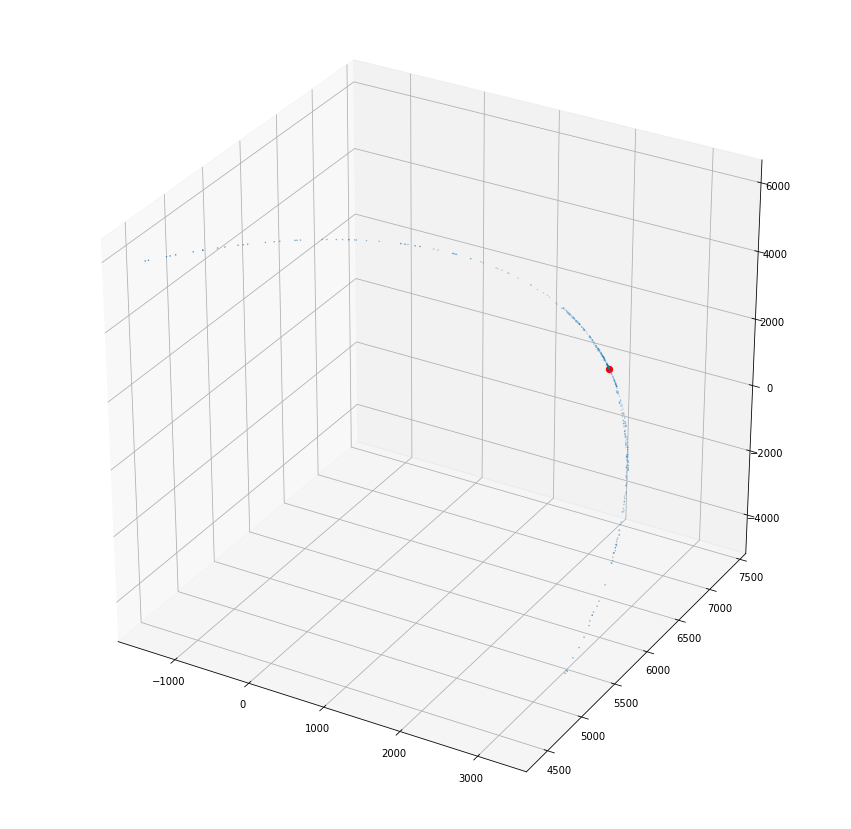

In [205]:
fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(111, projection='3d')
#ax.scatter(xcon, ycon, zcon, s = 0.2) 
b = 19
xa, ya, za = coordcalt(dfdeb_m.loc[norads[b]].line1.values, dfdeb_m.loc[norads[b]].line2.values, datetest)
ax.scatter(xa, ya, za, s = 0.2)
ax.scatter(xa[-1], ya[-1], za[-1], c = 'red', s = 40)

In [165]:
dfdeb_m.loc[norads[0]]

,m,argp,bstar,ddn_o6,dn_o2,ecc,epoch_day,epoch_year,inc,int_desig,n,raan,rev_num,line1,line2,object_id,object_name,country,period,inclination,apogee,perigee,rcs_size,launch,debc,apo,peri,datetimes
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2018.916314,270.3322,90.8959,0.000116,0.0,1.920000e-06,0.009762,335.370839,2018,66.7291,61015D,14.231530,321.6569,96598,1 00119U 61015D 18335.37083851 +.00000192 +0...,2 00119 066.7291 321.6569 0097618 090.8959 270...,1961-015D,THOR ABLESTAR DEB,US,101.18,66.73,891.0,738.0,MEDIUM,1961-06-29,True,7192.846360,7192.503639,2018-12-02 08:54:00.447264
2018.918618,270.9942,90.2340,0.000132,0.0,2.300000e-06,0.009762,336.214156,2018,66.7292,61015D,14.231535,319.4778,96653,1 00119U 61015D 18336.21415570 +.00000230 +0...,2 00119 066.7292 319.4778 0097624 090.2340 270...,1961-015D,THOR ABLESTAR DEB,US,101.18,66.73,891.0,738.0,MEDIUM,1961-06-29,True,7192.844760,7192.501997,2018-12-03 05:08:23.052480
2018.920538,271.5473,89.6810,0.000139,0.0,2.460000e-06,0.009764,336.916920,2018,66.7292,61015D,14.231539,317.6620,96620,1 00119U 61015D 18336.91691973 +.00000246 +0...,2 00119 066.7292 317.6620 0097637 089.6810 271...,1961-015D,THOR ABLESTAR DEB,US,101.18,66.73,891.0,738.0,MEDIUM,1961-06-29,True,7192.843405,7192.500551,2018-12-03 22:00:21.864672
2018.921690,271.8807,89.3476,0.000145,0.0,2.620000e-06,0.009765,337.338578,2018,66.7292,61015D,14.231542,316.5724,96626,1 00119U 61015D 18337.33857794 +.00000262 +0...,2 00119 066.7292 316.5724 0097647 089.3476 271...,1961-015D,THOR ABLESTAR DEB,US,101.18,66.73,891.0,738.0,MEDIUM,1961-06-29,True,7192.842368,7192.499443,2018-12-04 08:07:33.134016
2018.924762,272.7554,88.4725,0.000146,0.0,2.630000e-06,0.009766,338.462999,2018,66.7293,61015D,14.231550,313.6672,96685,1 00119U 61015D 18338.46299924 +.00000263 +0...,2 00119 066.7293 313.6672 0097665 088.4725 272...,1961-015D,THOR ABLESTAR DEB,US,101.18,66.73,891.0,738.0,MEDIUM,1961-06-29,True,7192.839682,7192.496631,2018-12-05 11:06:43.134336
2018.927258,273.4805,87.7471,0.000133,0.0,2.330000e-06,0.009769,339.376591,2018,66.7293,61015D,14.231555,311.3067,96655,1 00119U 61015D 18339.37659105 +.00000233 +0...,2 00119 066.7293 311.3067 0097687 087.7471 273...,1961-015D,THOR ABLESTAR DEB,US,101.18,66.73,891.0,738.0,MEDIUM,1961-06-29,True,7192.837738,7192.494533,2018-12-06 09:02:17.466720
2018.929947,274.2431,86.9839,0.000119,0.0,2.000000e-06,0.009770,340.360458,2018,66.7293,61015D,14.231562,308.7645,96669,1 00119U 61015D 18340.36045845 +.00000200 +0...,2 00119 066.7293 308.7645 0097705 086.9839 274...,1961-015D,THOR ABLESTAR DEB,US,101.18,66.73,891.0,738.0,MEDIUM,1961-06-29,True,7192.835430,7192.492098,2018-12-07 08:39:03.610080
2018.932443,274.9493,86.2769,0.000105,0.0,1.660000e-06,0.009772,341.274049,2018,66.7293,61015D,14.231568,306.4040,96725,1 00119U 61015D 18341.27404931 +.00000166 +0...,2 00119 066.7293 306.4040 0097715 086.2769 274...,1961-015D,THOR ABLESTAR DEB,US,101.18,66.73,891.0,738.0,MEDIUM,1961-06-29,True,7192.833543,7192.490141,2018-12-08 06:34:37.860384
2018.934171,275.4452,85.7803,0.000096,0.0,1.440000e-06,0.009772,341.906535,2018,66.7294,61015D,14.231571,304.7697,96691,1 00119U 61015D 18341.90653510 +.00000144 +0...,2 00119 066.7294 304.7697 0097724 085.7803 275...,1961-015D,THOR ABLESTAR DEB,US,101.18,66.73,891.0,738.0,MEDIUM,1961-06-29,True,7192.832320,7192.488855,2018-12-08 21:45:24.632640


In [53]:
dfdeb_m.loc[norads[0]].index

Float64Index([2018.9177672250273,  2018.920429616694, 2018.9206197876229,
              2018.9232821785247,  2018.924993714918, 2018.9261347391257,
               2018.928797128388, 2018.9314595168305, 2018.9331710518852,
              2018.9343120750545,
              ...
              2019.8945214307378, 2019.8973738194536, 2019.8998458898361,
              2019.9021278004918, 2019.9042195521859, 2019.9053605077322,
              2019.9080227374043,  2019.908593215246,  2019.912206241612,
               2019.913537356776],
             dtype='float64', name='date', length=498)

In [54]:
dfdeb_m.loc[norads[0]].head(1).ecc

date
2018.917767    0.011087
Name: ecc, dtype: float64

In [34]:
#dfdeb_m.ddn_o6.nunique()

3015

In [145]:
bins = 100
apoflist = [dfdeb_m.loc[x].head(1).apo.values for x in norads]
apoflist = [x[0] for x in apoflist]
apollist = [dfdeb_m.loc[x].tail(1).apo.values for x in norads]
apollist = [x[0] for x in apollist]
plothist([apoflist, apollist], two_feat = True, fname = 'apov1.png', bins = bins, x_axis_l = 'Apogee in km', y_axis_l = 'Count of Objects')
periflist = [dfdeb_m.loc[x].head(1).peri.values for x in norads]
periflist = [x[0] for x in periflist]
perillist = [dfdeb_m.loc[x].tail(1).peri.values for x in norads]
perillist = [x[0] for x in perillist]
plothist([periflist, perillist], two_feat = True, fname = 'periv1.png', bins = bins, x_axis_l = 'Perigee in km', y_axis_l = 'Count of Objects')
eccflist = [dfdeb_m.loc[x].head(1).ecc.values for x in norads]
eccflist = [x[0] for x in eccflist]
eccllist = [dfdeb_m.loc[x].tail(1).ecc.values for x in norads]
eccllist = [x[0] for x in eccllist]
plothist([eccflist, eccllist], two_feat = True, fname = 'ecc1.png', bins = bins, x_axis_l = 'Eccentricity', y_axis_l = 'Count of Objects')
incflist = [dfdeb_m.loc[x].head(1).inc.values for x in norads]
incflist = [x[0] for x in incflist]
incllist = [dfdeb_m.loc[x].tail(1).inc.values for x in norads]
incllist = [x[0] for x in incllist]
plothist([incflist, incllist], two_feat = True, fname = 'inc1.png', bins = bins, x_axis_l = 'Inclination in °', y_axis_l = 'Count of Objects')
nflist = [dfdeb_m.loc[x].head(1).n.values for x in norads]
nflist = [x[0] for x in nflist]
nllist = [dfdeb_m.loc[x].tail(1).n.values for x in norads]
nllist = [x[0] for x in nllist]
plothist([nflist, nllist], two_feat = True, fname = 'n1.png', bins = bins, x_axis_l = 'Daily revolutions', y_axis_l = 'Count of Objects')
bflist = [dfdeb_m.loc[x].head(1).bstar.values for x in norads]
bflist = [x[0] for x in bflist]
bllist = [dfdeb_m.loc[x].tail(1).bstar.values for x in norads]
bllist = [x[0] for x in bllist]
plothist([bflist, bllist], min_feat = -0.001, max_feat = 0.002, two_feat = True, fname = 'n1.png', bins = bins, x_axis_l = 'Solar radiation pressure', y_axis_l = 'Count of Objects')
dn_o2flist = [dfdeb_m.loc[x].head(1).dn_o2.values for x in norads]
dn_o2flist = [x[0] for x in dn_o2flist]
dn_o2llist = [dfdeb_m.loc[x].tail(1).dn_o2.values for x in norads]
dn_o2llist = [x[0] for x in dn_o2llist]
plothist([dn_o2flist, dn_o2llist], two_feat = True, min_feat = -0.00002, max_feat = 0.00002, fname = 'dn_o2.png', bins = bins, x_axis_l = 'Variation of revolution count', y_axis_l = 'Count of Objects')
dn_o6flist = [dfdeb_m.loc[x].head(1).ddn_o6.values for x in norads]
dn_o6flist = [x[0] for x in dn_o6flist]
dn_o6llist = [dfdeb_m.loc[x].tail(1).ddn_o6.values for x in norads]
dn_o6llist = [x[0] for x in dn_o6llist]
plothist([dn_o6flist, dn_o6llist], two_feat = True, min_feat = -0.00002, max_feat = 0.00002, fname = 'dn_o6.png', bins = bins, x_axis_l = 'Variation of variation of revolution count', y_axis_l = 'Count of Objects')

del apoflist, periflist, eccflist, incflist, apollist, perillist, eccllist, incllist, nflist, nllist, bllist, bflist, dn_o2llist, dn_o2flist

/Users/peterniksa/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: DeprecationWarning: Passing normed=False is deprecated, and has no effect. Consider passing the density argument instead.
/Users/peterniksa/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: DeprecationWarning: Passing normed=False is deprecated, and has no effect. Consider passing the density argument instead.


/Users/peterniksa/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: DeprecationWarning: Passing normed=False is deprecated, and has no effect. Consider passing the density argument instead.
/Users/peterniksa/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: DeprecationWarning: Passing normed=False is deprecated, and has no effect. Consider passing the density argument instead.


In [212]:
import pickle
pickle.dump(dfdeb, open('dfdeb_fc.p', 'wb'))
pickle.dump(dfdeb_m, open('dfdeb_m_fc.p', 'wb'))

In [ ]:
#Regression of orbit params as a function of time

In [ ]:
#consider dropping ddn_o6
#Observation: change in n (revolution count) is strongly linked with solar radiation pressure

In [42]:
#def xyz_coord_cal(n, ecc, inc, m, argp):
 #   x = 0
  #  y = 0
   # z = 0
    #apo = apogeecal(n)
#    peri = perigeecal(n, ecc)
 #   x = 
  #  return (x, y, z)
# argp argument of perigee
# raan right ascension of the ascending node

In [147]:
dfdeb.datetimes.values[0].year

2018

In [148]:
dfdeb.line1.values[:8]

array(['1 00119U 61015D   18343.94454394 +.00000169 +00000-0 +10634-3 0  9998',
       '1 00119U 61015D   18344.85813364 +.00000223 +00000-0 +12908-3 0  9992',
       '1 00119U 61015D   18345.27979033 +.00000244 +00000-0 +13812-3 0  9993',
       '1 00119U 61015D   18346.19337954 +.00000286 +00000-0 +15539-3 0  9999',
       '1 00119U 61015D   18346.89614006 +.00000316 +00000-0 +16825-3 0  9995',
       '1 00119U 61015D   18347.88000429 +.00000339 +00000-0 +17807-3 0  9999',
       '1 00119U 61015D   18348.23138422 +.00000347 +00000-0 +18120-3 0  9992',
       '1 00119U 61015D   18348.93414379 +.00000331 +00000-0 +17471-3 0  9998'],
      dtype=object)

In [75]:
beginsec = (2018 - 1970) * 365 * 24 * 3600 + 347 * 24 * 3600 - 3600
endsec = (2019 - 1970) * 365 * 24 * 3600 + 344 * 24 * 3600 - 3600
begd = datetime.fromtimestamp(beginsec)
endd = datetime.fromtimestamp(endsec)
print(begd, endd)

2018-12-02 00:00:00 2019-11-29 00:00:00


In [103]:
dfdeb_m.epoch_day.astype('str').values[22]

'351.84174945'

In [102]:
int(float('0.' + dfdeb_m.epoch_day.astype('str').values[22].split('.')[1]) * 24 * 3600)

72727

In [132]:
#print(dfdeb_m.epoch_year.values[0])
datetime(year = int(dfdeb_m.epoch_year.values[5]), month = 1, day = 1, hour = 0, minute = 0, second = 0)\
+ timedelta(seconds = dfdeb_m.epoch_day.values[5] * 24 * 3600)
#+ timedelta(seconds = int(float('0.' + dfdeb_m.epoch_day.astype('str').values[22].split('.')[1]) * 24 * 3600))



datetime.datetime(2018, 12, 5, 23, 10, 3, 174528)

In [111]:
#pd.to_datetime(year = dfdeb_m.loc[norads[0]].index[0])
dfdeb_m.loc[norads[0]].index[0]
#datetime(2018) + timedelta(days=330)
#datetime(dfdeb_m.loc[norads[0]].index[0])

TypeError: function missing required argument 'month' (pos 2)

In [44]:
dfdeb.line1.values[0]

'1 00123U 61015H   18343.90708637 +.00000052 +00000-0 +45129-4 0  9990'

In [72]:
date = datetime(year = 2019, month = 5, day = 10, hour = 5, minute = 30, second = 10)
date.year
#date = 0
#print(dfdeb.line1.values[0])
#xyz_model(dfdeb.line1.values[0], dfdeb.line2.values[0], date)

2019

In [168]:
dfdeb_m

m      argp     bstar  ddn_o6         dn_o2  \
norad date                                                              
126   2018.917755  233.8130  126.8786  0.000090     0.0  1.800000e-06   
      2018.920610  234.6767  126.0209  0.000090     0.0  1.820000e-06   
      2018.923274  235.4834  125.2197  0.000092     0.0  1.880000e-06   
      2018.923655  235.5982  125.1056  0.000091     0.0  1.850000e-06   
      2018.925177  236.0538  124.6530  0.000092     0.0  1.860000e-06   
      2018.928793  237.1403  123.5736  0.000096     0.0  1.990000e-06   
      2018.931457  237.9299  122.7889  0.000099     0.0  2.060000e-06   
      2018.933169  238.4365  122.2854  0.000097     0.0  2.020000e-06   
      2018.934121  238.7162  122.0073  0.000097     0.0  2.020000e-06   
      2018.936975  239.5743  121.1544  0.000096     0.0  1.980000e-06   
      2018.938688  240.0836  120.6480  0.000095     0.0  1.950000e-06   
      2018.939639  240.3681  120.3651  0.000092     0.0  1.880000e-06   
      2018.941923  241.0480  119.6891  0.000093     0.0  1.900000e-06   
      2018.945158  242.0185  118.7239  0.000094     0.0  1.920000e-06   
      2018.945158  242.0185  118.7239  0.000094     0.0  1.920000e-06   
      2018.947822  242.8109  117.9357  0.000100     0.0  2.120000e-06   
      2018.950486  243.6069  117.1437  0.000100     0.0  2.100000e-06   
      2018.952199  244.1160  116.6372  0.000098     0.0  2.060000e-06   
      2018.953150  244.4104  116.3443  0.000097     0.0  2.030000e-06   
      2018.955814  245.2085  115.5499  0.000094     0.0  1.940000e-06   
      2018.957717  245.7770  114.9843  0.000092     0.0  1.860000e-06   
      2018.958669  246.0437  114.7183  0.000091     0.0  1.850000e-06   
      2018.961333  246.8372  113.9284  0.000091     0.0  1.830000e-06   
      2018.963236  247.4028  113.3653  0.000090     0.0  1.800000e-06   
      2018.963997  247.6300  113.1389  0.000090     0.0  1.800000e-06   
      2018.966090  248.2490  112.5224  0.000087     0.0  1.720000e-06   
      2018.966661  248.4217  112.3505  0.000089     0.0  1.770000e-06   
      2018.968754  249.0433  111.7311  0.000088     0.0  1.760000e-06   
      2018.968754  249.0433  111.7311  0.000088     0.0  1.760000e-06   
      2018.971989  250.0152  110.7630  0.000089     0.0  1.780000e-06   
      2018.974273  250.6981  110.0826  0.000086     0.0  1.690000e-06   
      2018.975034  250.9261  109.8555  0.000086     0.0  1.690000e-06   
      2018.977888  251.7812  109.0032  0.000083     0.0  1.610000e-06   
      2018.980362  252.5224  108.2643  0.000081     0.0  1.550000e-06   
      2018.980553  252.5812  108.2057  0.000081     0.0  1.530000e-06   
      2018.983217  253.3827  107.4066  0.000081     0.0  1.550000e-06   
      2018.985881  254.1814  106.6102  0.000085     0.0  1.670000e-06   
      2018.987974  254.8033  105.9900  0.000084     0.0  1.640000e-06   
      2018.988735  255.0351  105.7588  0.000084     0.0  1.620000e-06   
      2018.990638  255.6052  105.1901  0.000086     0.0  1.700000e-06   
      2018.991399  255.8381  104.9578  0.000085     0.0  1.660000e-06   
      2018.991399  255.8381  104.9578  0.000085     0.0  1.660000e-06   
      2018.993493  256.4666  104.3308  0.000085     0.0  1.670000e-06   
      2018.994063  256.6441  104.1536  0.000084     0.0  1.620000e-06   
      2018.996157  257.2696  103.5294  0.000084     0.0  1.630000e-06   
      2018.996728  257.4432  103.3562  0.000084     0.0  1.630000e-06   
      2018.998630  258.0127  102.7879  0.000078     0.0  1.450000e-06   
      2018.998821  258.0707  102.7301  0.000078     0.0  1.440000e-06   
      2018.999201  258.1877  102.6133  0.000077     0.0  1.420000e-06   
      2019.004407  258.9333  101.8691  0.000071     0.0  1.250000e-06   
      2019.004598  258.9918  101.8107  0.000070     0.0  1.230000e-06   
      2019.006881  259.6794  101.1243  0.000065     0.0  1.050000e-06   
      2019.007642  259.9139  100.8902  0.000066     0.0  1.090000e-06   
      2019.

In [167]:
class Normalization():
    def __init__(self, df):
        df = df
        apomin = df.apo.min()
        apomax = df.apo.max()
        perimin = df.peri.min()
        perimax = df.peri.max()
        incmin = df.inc.min()
        incmax = df.inc.max()
        eccmin = df.ecc.min()
        eccmax = df.ecc.max()
        nmin = df.n.min()
        nmax = df.n.max()
        pass

In [123]:
pp.normalize(dfdeb_m.loc[norads[0]].index)

ValueError: Expected 2D array, got 1D array instead:
array=[2018.91775547 2018.9206099  2018.92327403 2018.92365463 2018.92517699
 2018.92879259 2018.93145672 2018.93316937 2018.93412085 2018.93697527
 2018.93868792 2018.93963939 2018.94192293 2018.94515794 2018.94515794
 2018.94782206 2018.95048618 2018.95219883 2018.9531503  2018.95581442
 2018.95771736 2018.95866883 2018.96133294 2018.96323588 2018.96399706
 2018.96609029 2018.96666117 2018.9687544  2018.9687544  2018.9719894
 2018.97427292 2018.97503409 2018.9778885  2018.98036231 2018.98055261
 2018.98321671 2018.98588082 2018.98797405 2018.98873522 2018.99063815
 2018.99139933 2018.99139933 2018.99349255 2018.99406343 2018.99615665
 2018.99672753 2018.99863046 2018.99882076 2018.99920134 2019.00440739
 2019.00459768 2019.0068812  2019.00764237 2019.01030647 2019.01297057
 2019.01582496 2019.01848906 2019.02115316 2019.02286579 2019.02362696
 2019.02552989 2019.02629106 2019.02895515 2019.02933574 2019.03142896
 2019.03257071 2019.03466393 2019.03694744 2019.03732802 2019.04018241
 2019.04246591 2019.0428465  2019.04551059 2019.04798439 2019.04817468
 2019.05064848 2019.05083877 2019.05331257 2019.05369316 2019.05635725
 2019.05864075 2019.05902134 2019.06073396 2019.06168542 2019.06415922
 2019.06682331 2019.06720389 2019.07081944 2019.07253206 2019.07253206
 2019.07519615 2019.07766994 2019.07976315 2019.08071461 2019.08337869
 2019.08528161 2019.08604277 2019.08870685 2019.09156123 2019.0942253
 2019.09688938 2019.09898259 2019.09955346 2019.10354957 2019.10469132
 2019.1050719  2019.10640394 2019.10773598 2019.10925831 2019.11040005
 2019.11192238 2019.11458645 2019.11591849 2019.11725052 2019.11991459
 2019.12257866 2019.12276895 2019.1239107  2019.12543302 2019.12657477
 2019.12885825 2019.13095145 2019.13361552 2019.13437668 2019.13646987
 2019.13913393 2019.1398951  2019.141798   2019.14255916 2019.14465235
 2019.14693583 2019.14959989 2019.15226395 2019.15359598 2019.1551183
 2019.15835322 2019.1606367  2019.16082699 2019.16368133 2019.1642522
 2019.16634539 2019.16653568 2019.16729683 2019.16919973 2019.17186378
 2019.17224436 2019.17471812 2019.17738216 2019.17776274 2019.17947534
 2019.18042679 2019.18480343 2019.1853743  2019.18746748 2019.18803834
 2019.19070238 2019.19298585 2019.19641104 2019.19926537 2019.2019294
 2019.20211969 2019.20478373 2019.20744776 2019.20916036 2019.2101118
 2019.21182439 2019.21296612 2019.21467871 2019.214869   2019.21772331
 2019.22095821 2019.22381252 2019.22647655 2019.22914057 2019.23199489
 2019.23275604 2019.23446862 2019.23656178 2019.23732293 2019.23884523
 2019.23922581 2019.23998695 2019.24208011 2019.24265098 2019.24455385
 2019.245315   2019.24797901 2019.25007217 2019.25102361 2019.25292648
 2019.25349734 2019.25540021 2019.25882537 2019.26110881 2019.26167967
 2019.26396311 2019.26453397 2019.26738827 2019.26967171 2019.27176486
 2019.27442887 2019.27785402 2019.28051803 2019.28356261 2019.28622661
 2019.28870033 2019.29098376 2019.29136433 2019.29440891 2019.29669234
 2019.29973691 2019.30240091 2019.30525519 2019.30753862 2019.30925119
 2019.31020262 2019.31267633 2019.31476947 2019.31572089 2019.31876546
 2019.32028774 2019.32142945 2019.32409344 2019.32656715 2019.32675744
 2019.32923114 2019.33189513 2019.33398827 2019.33455912 2019.3374134
 2019.34007738 2019.34026767 2019.34312194 2019.34578592 2019.34844991
 2019.35301673 2019.35396815 2019.35663213 2019.35853498 2019.35929611
 2019.36196009 2019.36405322 2019.36462407 2019.36747833 2019.37014231
 2019.37280629 2019.37680225 2019.37756338 2019.3796565  2019.38193991
 2019.38365246 2019.3878387  2019.38898041 2019.39126381 2019.39316664
 2019.3960209  2019.3971626  2019.39868486 2019.40134883 2019.4040128
 2019.40420308 2019.40686705 2019.4097213  2019.41029215 2019.41238526
 2019.4131464  2019.41581036 2019.41790347 2019.42056744 2019.42151885
 2019.42304112 2019.42589536 2019.42855933 2019.43141357 2019.43236499
 2019.43426781 2019.43693177 2019.43959573 2019.44149856 2019.44511394
 2019.44530422 2019.44796818 2019.45063213 2019.4510127  2019.45329609
 2019.45596005 2019.45672118 2019.45881429 2019.46147824 2019.4641422
 2019.46433248 2019.46699644 2019.46966039 2019.46985068 2019.47232435
 2019.47517858 2019.47536887 2019.47784254 2019.48031621 2019.48298016
 2019.48564411 2019.48887891 2019.48887891 2019.49154287 2019.49420682
 2019.49458738 2019.49687077 2019.49953472 2019.50143754 2019.50219867
 2019.5050529  2019.50771685 2019.51057108 2019.51323503 2019.51589898
 2019.51856293 2019.5189435  2019.52122688 2019.52389083 2019.529409
 2019.53245351 2019.53511745 2019.53511745 2019.5377814  2019.54044534
 2019.54234815 2019.54329956 2019.5459635  2019.54786632 2019.54862744
 2019.55129138 2019.55395532 2019.55680955 2019.55947348 2019.56213742
 2019.56480136 2019.56727502 2019.57031952 2019.57298345 2019.57564739
 2019.57793076 2019.57831133 2019.58116554 2019.58363919 2019.58649341
 2019.58915734 2019.59182127 2019.59467548 2019.59733941 2019.60000334
 2019.60133531 2019.60266727 2019.60552148 2019.60704372 2019.60818541
 2019.61332298 2019.61332298 2019.6159869  2019.61865082 2019.62074391
 2019.62150503 2019.62397867 2019.62626203 2019.62683287 2019.63101903
 2019.63235099 2019.63482463 2019.63767883 2019.64186499 2019.64452891
 2019.64567058 2019.6473831  2019.65004702 2019.6511887  2019.65290121
 2019.65480401 2019.65803876 2019.65822904 2019.66108323 2019.66355687
 2019.66374714 2019.66641106 2019.66926525 2019.66983608 2019.67192916
 2019.67459307 2019.67535418 2019.67725698 2019.68011116 2019.68087228
 2019.68277507 2019.68562925 2019.68639037 2019.68829316 2019.69114734
 2019.69190846 2019.69343069 2019.69628487 2019.69894877 2019.69913905
 2019.70199323 2019.70446686 2019.70465714 2019.70732104 2019.70998494
 2019.71017521 2019.71264884 2019.71569329 2019.71607385 2019.71835719
 2019.72102108 2019.72159192 2019.7261586  2019.7278711  2019.72882249
 2019.73186694 2019.73357945 2019.73472111 2019.73700445 2019.7400489
 2019.74023918 2019.74290307 2019.74556696 2019.74575724 2019.74842112
 2019.75108501 2019.75127529 2019.75317807 2019.75660306 2019.75812528
 2019.75907667 2019.76193083 2019.76364333 2019.764785   2019.76744888
 2019.76916137 2019.77011276 2019.77296692 2019.77525025 2019.7756308
 2019.77829468 2019.78095856 2019.78362244 2019.78628631 2019.78837936
 2019.78914047 2019.79085296 2019.79465849 2019.79656126 2019.79827375
 2019.80150845 2019.8043626  2019.80740702 2019.80797785 2019.81064172
 2019.81349586 2019.81615973 2019.81901387 2019.82148746 2019.82434159
 2019.82643463 2019.82700546 2019.82985959 2019.83252345 2019.83518731
 2019.83785117 2019.83937337 2019.84051502 2019.84317888 2019.84565246
 2019.84603301 2019.84869686 2019.85136071 2019.85687869 2019.85954254
 2019.86220639 2019.86372859 2019.86487024 2019.86753408 2019.86924655
 2019.8703882  2019.87495479 2019.87666726 2019.87933111 2019.88104358
 2019.88218522 2019.88389769 2019.88656153 2019.88770318 2019.89036702
 2019.89303086 2019.89550442 2019.89835853 2019.900071   2019.90121264
 2019.90406675 2019.90654031 2019.90673059 2019.9080625  2019.91205825].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [37]:
!pip install ephem

     |████████████████████████████████| 1.5MB 671kB/s eta 0:00:01


In [39]:
!pip install sgp4

  Stored in directory: /Users/peterniksa/Library/Caches/pip/wheels/6d/e2/42/5dc20daf2ba62ae03dc8abe10744ee67d9452df447dac561db
Successfully built sgp4


In [47]:
!pip install pysat

     |████████████████████████████████| 174kB 1.7MB/s eta 0:00:01
     |████████████████████████████████| 6.4MB 1.2MB/s eta 0:00:01
     |████████████████████████████████| 634kB 6.3MB/s eta 0:00:01
     |████████████████████████████████| 1.2MB 7.5MB/s eta 0:00:01
     |████████████████████████████████| 122kB 16.3MB/s eta 0:00:01
     |████████████████████████████████| 296kB 5.0MB/s eta 0:00:01
  Stored in directory: /Users/peterniksa/Library/Caches/pip/wheels/ce/6f/5b/47557066199744baa76fe52f40b9542816e5df0a5bf56ce0ae
  ERROR: Complete output from command /Users/peterniksa/anaconda3/bin/python -u -c 'import setuptools, tokenize;__file__='"'"'/private/var/folders/cy/kwrfh13j5s3g_4nl2q2c1wdh0000gn/T/pip-install-hvms58kz/pysatCDF/setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d /private/var/folders/cy/kwrfh13j5s3g_4nl2q2c1wdh0000gn/T/pip-wheel-rpaffq

ERROR: Command "/Users/peterniksa/anaconda3/bin/python -u -c 'import setuptools, tokenize;__file__='"'"'/private/var/folders/cy/kwrfh13j5s3g_4nl2q2c1wdh0000gn/T/pip-install-hvms58kz/pysatCDF/setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' install --record /private/var/folders/cy/kwrfh13j5s3g_4nl2q2c1wdh0000gn/T/pip-record-f12dxyye/install-record.txt --single-version-externally-managed --compile" failed with error code 1 in /private/var/folders/cy/kwrfh13j5s3g_4nl2q2c1wdh0000gn/T/pip-install-hvms58kz/pysatCDF/


In [38]:
import ephem

In [ ]:
reconvert df entry into tle 

In [16]:


line1 = ('1 00005U 58002B   00179.78495062 +'
         '.00000023 +00000-0 +28098-4 0  4753')
line2 = ('2 00005  34.2682 348.7242 1859667 '
         '331.7664  19.3264 10.82419157413667')

#1     5U 58002B   19292.92671750 +.00000171 +00000-0 +22506-3 0  9997
#2     5 034.2474 252.3331 1842730 345.5028 009.8881 10.84775502179024

satellite = twoline2rv(line1, line2, wgs72)
position, velocity = satellite.propagate(
    2000, 6, 29, 12, 50, 19) # year month day hour min sec
position2, velocity2 = satellite.propagate(
    2000, 6, 29, 12, 50, 20)
position3, velocity3 = satellite.propagate(
    2000, 6, 29, 12, 50, 30)
position3, velocity3 = satellite.propagate(
    2000, 6, 29, 13, 10, 30)

print(satellite.error)    # nonzero on error

print(satellite.error_message)

print(position)
print(position2)
print(position3)

print(velocity)
print(velocity2)
print(velocity3)


0
None
(5576.056952400577, -3999.371134576461, -1521.9571594376116)
(5580.826504085285, -3994.2487998638535, -1517.6818750073046)
(6111.567770839175, 3546.8213910043314, 3508.7678698666164)
(4.772627303379327, 5.119817120959581, 4.275553909172121)
(4.76621981664731, 5.124407812768562, 4.277302836011549)
(-3.5193460116170794, 5.7523994307049575, 3.0667718428415904)
